NEW

In [1]:
#imports
import os
import sys
import time
from mainfunctions import *
from postprocessing import *

In [2]:
nofimages= 20
rdwcentre= 188.5
rdwwidth= 2423
code='tbw101'

make_images_bw_09(code,nofimages,rdwcentre,rdwwidth)

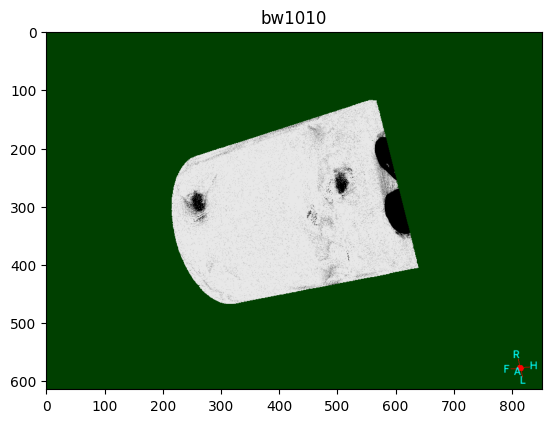

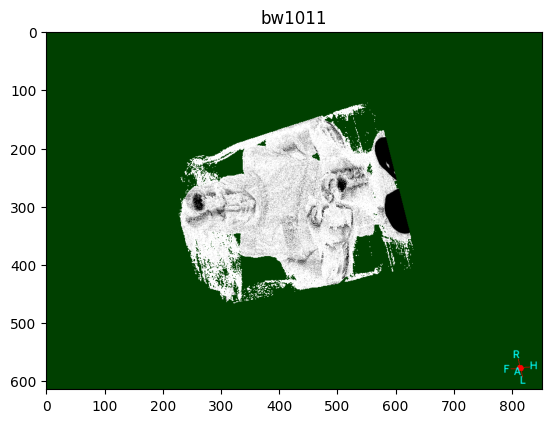

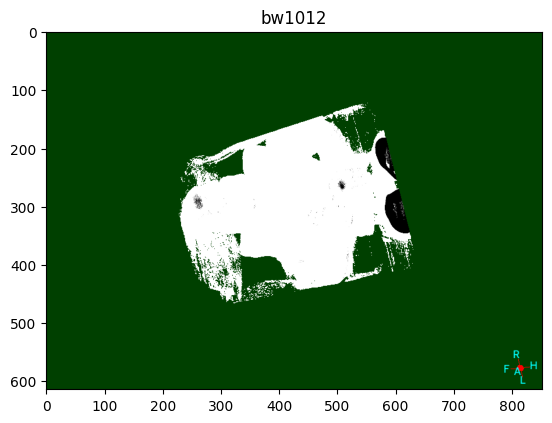

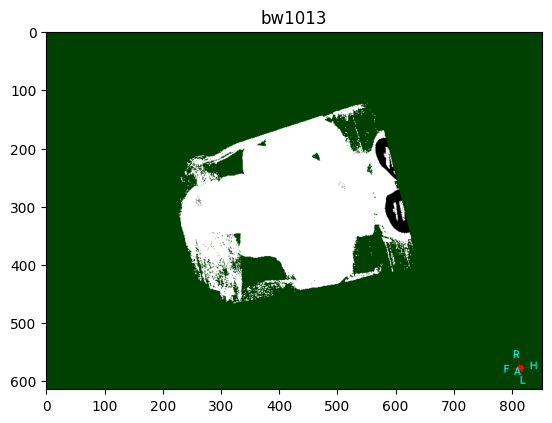

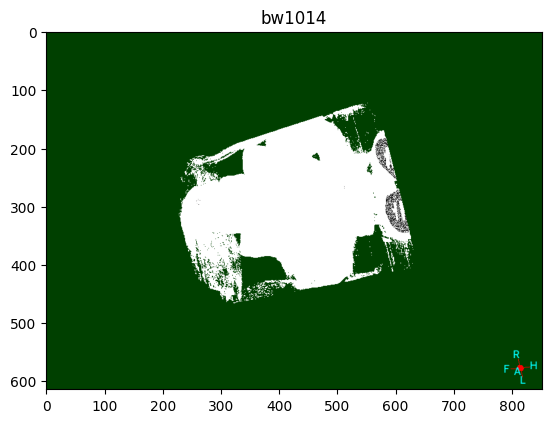

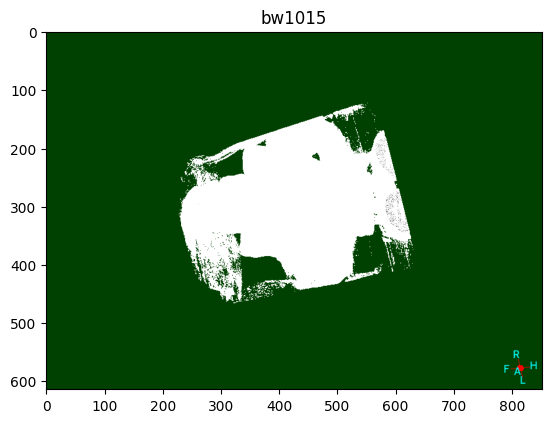

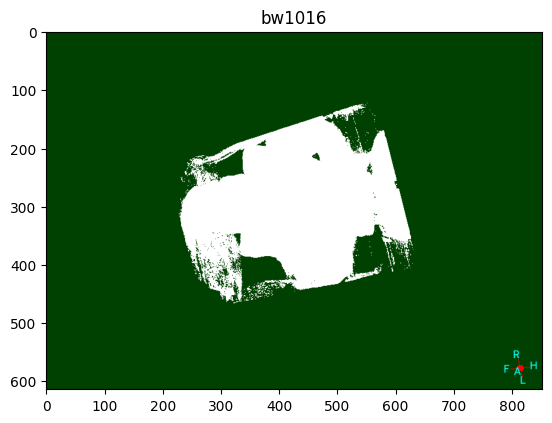

0.0
82.0


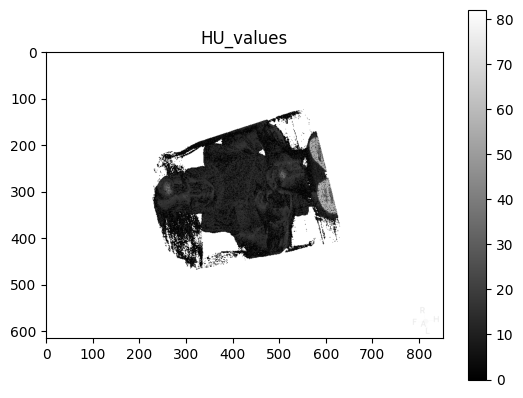

In [7]:
#read images 
imagecode= 'bw101'
image_number=0
nofimages= 20
section_width= 255//nofimages


while image_number<nofimages:
    image_path="Data\\actionman1\\" +str(imagecode)+str(image_number)+ str(".png")
    #if image path exists then load image, if not then break
    if not os.path.exists(image_path):
        break
    img = imageio.imread(image_path)
    #remove alpha channel
    img = img[:,:,:3]
    #remove white 
    plt.figure()
    plt.imshow(img)
    plt.title(imagecode+str(image_number))
    plt.show()
    #grayscale 
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    if image_number==0:
        HU_values= np.zeros((gray_img.shape[0],gray_img.shape[1]))
    for px in range(0,gray_img.shape[0]):
        for py in range(0,gray_img.shape[1]):
            if gray_img[px,py]>0 and gray_img[px,py]<255:
                HU_values[px,py]=int((image_number+1)*section_width -gray_img[px,py]*section_width/255)
   
    image_number+=1

#show HU values
#min and max
print(np.min(HU_values))
print(np.max(HU_values))
plt.figure()
plt.imshow(HU_values, cmap='gray')
plt.title('HU_values')
plt.colorbar()
plt.show()



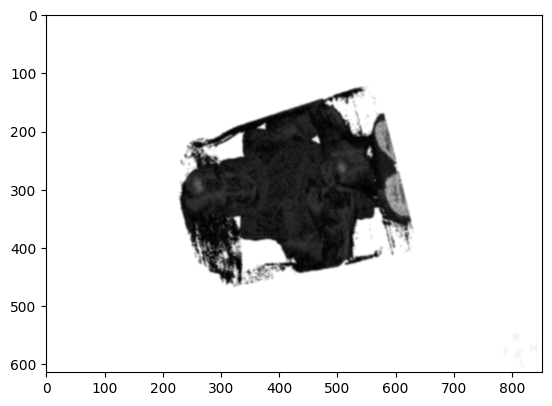

In [8]:
#blur image
blurred_img = cv.GaussianBlur(HU_values, (7,7), 0)
plt.figure()
plt.imshow(blurred_img, cmap='gray')

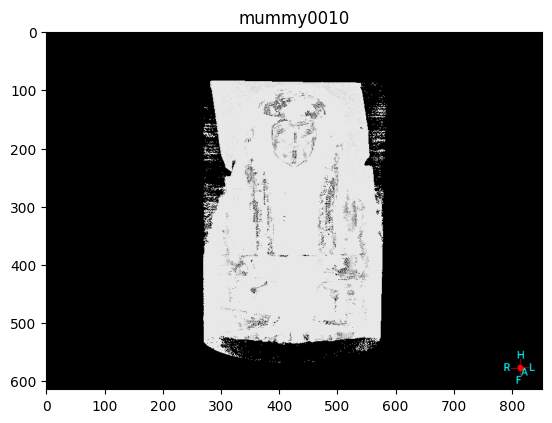

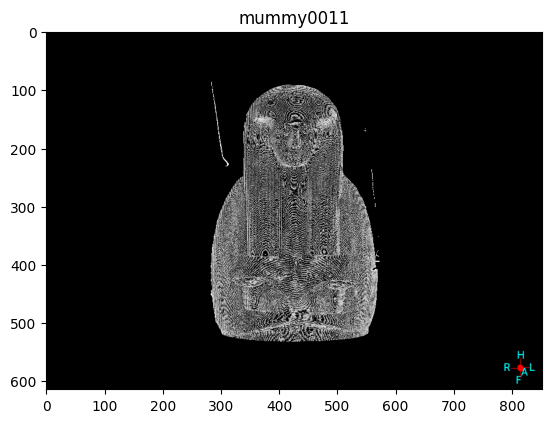

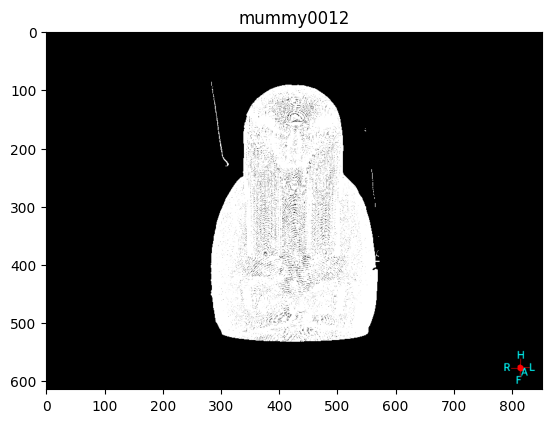

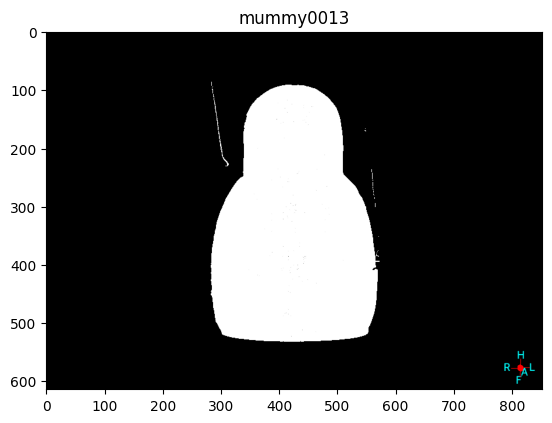

0.0
47.0


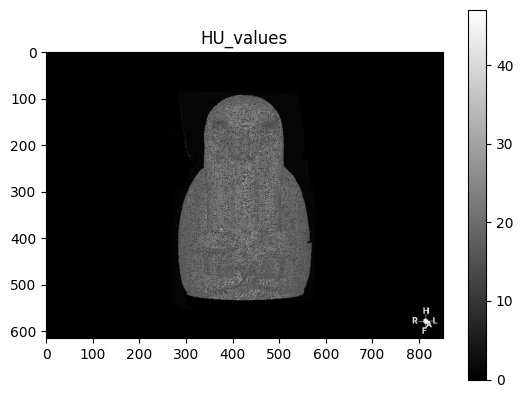

In [2]:
#read images 
#prev mummy001
imagecode= 'mummy001'
image_number=0
nofimages= 20
section_width= 255//nofimages

while image_number<nofimages:
    image_path="Data\\mummy\\Mummy Board\\" +str(imagecode)+str(image_number)+ str(".png")
    #if image path exists then load image, if not then break
    if not os.path.exists(image_path):
        break
    img = imageio.imread(image_path)
    #remove alpha channel
    img = img[:,:,:3]
    #remove white 
    plt.figure()
    plt.imshow(img)
    plt.title(imagecode+str(image_number))
    plt.show()
    #grayscale 
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    if image_number==0:
        HU_values= np.zeros((gray_img.shape[0],gray_img.shape[1]))
    for px in range(0,gray_img.shape[0]):
        for py in range(0,gray_img.shape[1]):
            if gray_img[px,py]>0 and gray_img[px,py]<255:
                HU_values[px,py]=int((image_number+1)*section_width -gray_img[px,py]*section_width/255)
   
    image_number+=1

#show HU values
#min and max
print(np.min(HU_values))
print(np.max(HU_values))
plt.figure()
plt.imshow(HU_values, cmap='gray')
plt.title('HU_values')
plt.colorbar()
plt.show()


In [4]:
#save image 
imageio.imwrite("photosforanalysis\\HU_img_sweep_opaque.png", HU_values.astype(np.uint8))


In [6]:
#fit the Hu values image with the mummy image

'''#crop the Hu image using user click on the image
crop_img = cv.selectROI(crop_img)
crop_img = HU_values[int(crop_img[1]):int(crop_img[1]+crop_img[3]), int(crop_img[0]):int(crop_img[0]+crop_img[2])]
plt.figure()
plt.imshow(crop_img, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()'''
imageio.imwrite("photosforanalysis\\HU_img_sweep_opaque_cropped2.png", crop_img )



OSError: cannot write mode F as PNG

: 

ModuleNotFoundError: No module named 'pil'

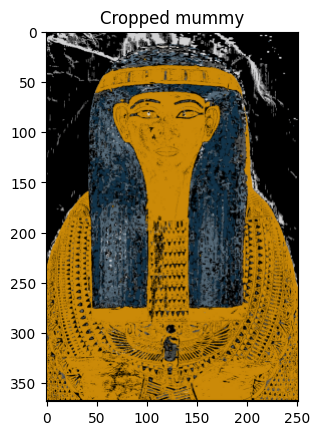

In [7]:
#read image from folder 
image_path= "C:\\Users\\Ana Stojanovic\\OneDrive\\Desktop\\IIB project\\photosforanalysis\\mummy.png"

img = imageio.imread(image_path)
#remove alpha channel
img = img[:,:,:3]

#interactive crop
crop2_img = cv.selectROI(img)
crop2_img = img[int(crop2_img[1]):int(crop2_img[1]+crop2_img[3]), int(crop2_img[0]):int(crop2_img[0]+crop2_img[2])]
plt.figure()
plt.imshow(crop2_img)
plt.title('Cropped mummy')
plt.show()



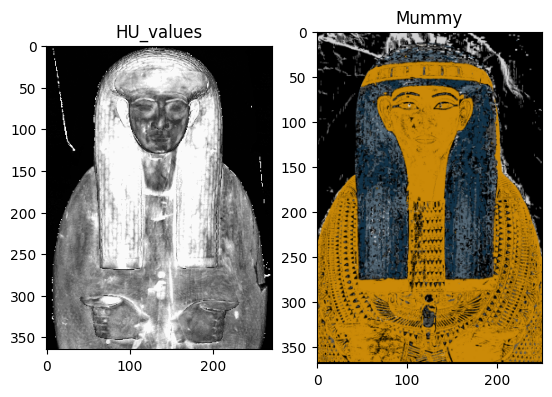

In [10]:
# dispaly side by side
fig, axs = plt.subplots(1, 2)
axs[0].imshow(crop_img, cmap='gray')
axs[0].set_title('HU_values')
axs[1].imshow(crop2_img)
axs[1].set_title('Mummy')
plt.show()


In [11]:
#save crop image as black and white image

cv.imwrite('Data\\mummy\\Mummy Board\\mummyhuvaluesbwt09.png',crop_img)

True